# The Malthusian Growth Model

Imports and set magics:

In [37]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import math
import modelextra as md
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Description of the Malthusian Model

The Malthusian Growth Model is a model of population growth. The concepts of the model was first proposed in 1798 by Robert Thomas Malthus, an English economist. The overall idea is that technological advances alone will not improve a population's well-being in the long run, because it caused the population growth, and the income per capita thus falls back to its initial level. This mechanism explained the stagnation up until that point in time - but not too long after, the assumptions of the Malthusian model seemed to fail as the industrial revolution led to an extreme growth in income per capita. 

In this model project, we attempt to illustrate how population and income per capita responds and adapts to changes to the technology and population for different assumptions about the mortality rate of the given population.

We consider a model where time is discrete, t=0,1,2,...,$\infty$. The economy is closed meaning that total production is equal to total income. There are three main assumptions to the Malthusain model. The first assumption is that labour is subject to diminishing marginal returns in production, which is represented in the model as the Cobb-Douglas production function:

$$Y_t=L_t^{1-\alpha}(AX)^\alpha, 0 < \alpha < 1$$

where t denotes time, t=0,1,2.., $Y_t$ denotes output, $A$ is the level of techonology, $L_t$ is labor input and $X$ is land (fixed factor of production). Output per worker can we written as:

$$y_t=\left(\frac{AX}{L_t}\right)^\alpha$$

This equation shows that output per worker declines as labor ($L$) increases due to the assumption of diminishing returns, given that $AX$ is constant. In our model we will assume that the level of technology ($A$) changes in form of arbitrarily timed discrete shocks (representing new innovations being made) and land ($X$) is constant.

The next main assumption of the Malthusian model is that the birth rate in the economy increases with income per capita, which is shown in this equation:

$$n_t=\eta y_t$$

where $\eta$ is a positive parameter. This equation implies that every person in the economy gets $n_t$ children in each period. We further assume that the preferable number of children increases with income per capita. With this assumption it would be reasonable to think of $\eta$ as a parameter below one, where each parent in the economy uses a fixed fraction of their income to provide for their children (food, clothes, etc.). We can thus interpret $\eta$ as a parameter capturing preferences for family size and cost of child rearing etc.

For simplicity, we assume that everyone in the economy works, meaning no unemployment. We then assume that the labor force ($L_t$) evolves as follows:

$$L_{t+1}=n_tL_t+(1-\mu)L_t$$
$L_0$ given.

This equations implies that the labor force in the next period ($L_{t+1}$) is equal to the current labor force ($L_t$) times births per person ($n_t$), plus the part of the current labor force, which is still in the labor force (the fraction $(1-\mu)$). Assuming that people work intil they die, we can think of $\mu$ as the mortality rate, where a higher $\mu$ means higher mortality.

By inserting $y_t$ into $n_t$ and inserting that into the labour force equation we get: 

$$L_{t+1}=\eta(AX/L_t)^\alpha L_t+(1-\mu)L_t \Leftrightarrow L_{t+1}=\eta L^{1-\alpha}(AX)^\alpha+(1-\mu)L_t$$
$L_0$ given.

We would like to investigate the steady state values, and to do that we introduce the definion: 

$$L_{t+1}=L_t=L^*$$

This means that we can turn the labor force equation into: 

$$L^*=\eta (L^*)^{1-\alpha}(AX)^\alpha+(1-\mu)L^* \Leftrightarrow L^*=\left(\frac{\eta}{\mu}\right)^{1/\alpha}AX$$

Below we define the steady state output per capita as the value of $y_t$ when the labor force is in steady state.

$$y_t=(AX/L_t)^\alpha \Leftrightarrow y^*=(AX/L^*)^\alpha$$

Now inserting $L^*$ into $y^*$:

$$y^*=\left[\left(\frac{\eta}{\mu}\right)^{-1/\alpha}\right]^\alpha=\frac{\mu}{\eta}$$

We thus obtain the essential result of the Malthusian model, where it shows that living standards only are determined by fertility and mortality under the assumptions. The technological level (as well as land size) will thus only have an effect on the living standards in the short run.

# Analytical solution: Microfoundation

We will now provide a microfoundation of the model, explaining the dynamics behind $\eta$, where we use SymPy to derive a solution. 

We consider a one person household with preferences:

$$u_t = \beta \log (c_t) + (1-\beta) \log (n_t)$$

where $\beta \in (0,1)$. The equation show that the one person household derives utility from consumption and the amount of children they get. The budget constraint is given as: 

$$y_t \geq \lambda n_t + c_t$$

where $y_t$ is the income of the one person household, which is used on the person themselves and the children he/she gets. $\lambda$ is a parameter denoting the price of consumption for the children. 

First, we define the symbols/parameters in the model.

In [38]:
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

ut = sm.symbols('u_t')
beta = sm.symbols('beta')
yt = sm.symbols('y_t')
ct = sm.symbols('c_t')
nt = sm.symbols('n_t')
Lambda = sm.symbols('lambda')

We start by defining the objective function, which is the utility function we wish to maximize (and print it out).

In [39]:
objective = beta*sm.log(ct)+(1-beta)*sm.log(nt)
objective

beta*log(c_t) + (1 - beta)*log(n_t)

Then we define the budget constraint, where we assume that the household use all of the income on consumption and having children.

In [40]:
budget_constraint = sm.Eq(Lambda*nt+ct, yt)
budget_constraint

Eq(c_t + lambda*n_t, y_t)

We isolate $c_t$, which is given by the following:

In [41]:
budget_constraint_cons = sm.solve(budget_constraint, ct)
budget_constraint_cons[0]

-lambda*n_t + y_t

We substitute this into the objective function, such that utility is defined as follows:

In [42]:
objective_subs = objective.subs(ct, budget_constraint_cons[0])
objective_subs

beta*log(-lambda*n_t + y_t) + (1 - beta)*log(n_t)

We now find the first-order condition w.r.t. $n_t$:

In [43]:
foc = sm.diff(objective_subs, nt)
foc

-beta*lambda/(-lambda*n_t + y_t) + (1 - beta)/n_t

The final step is to solve the FOC for $n_t$, which yields the result below.

In [44]:
sol = sm.solve(sm.Eq(foc,0), nt)
sol[0]

y_t*(1 - beta)/lambda

In other words, this means that $\eta\equiv\frac{1-\beta}{\lambda}$ in the equation $n_t=\eta y_t$. It also underlines the fact that $\eta$ is positive as $\beta\in(0,1)$ and $\lambda$ is assumed to be positive. A plausible value could then be...

# Numerical solution

We are looking to simulate the steady state value of the labor force, $L^*$. Furthermore, we are simulating a positive shock to the technology curve, A, in order to see how that affects the output per worker and the labor force.
We are defining the parameters of the model as follows:

$$\alpha = 0.5$$
$$\eta = 0.8$$
$$\mu = 0.1$$
$$L_0 = 100$$
$$L_t = L_0$$
$$A = 2$$
$$X = 3$$

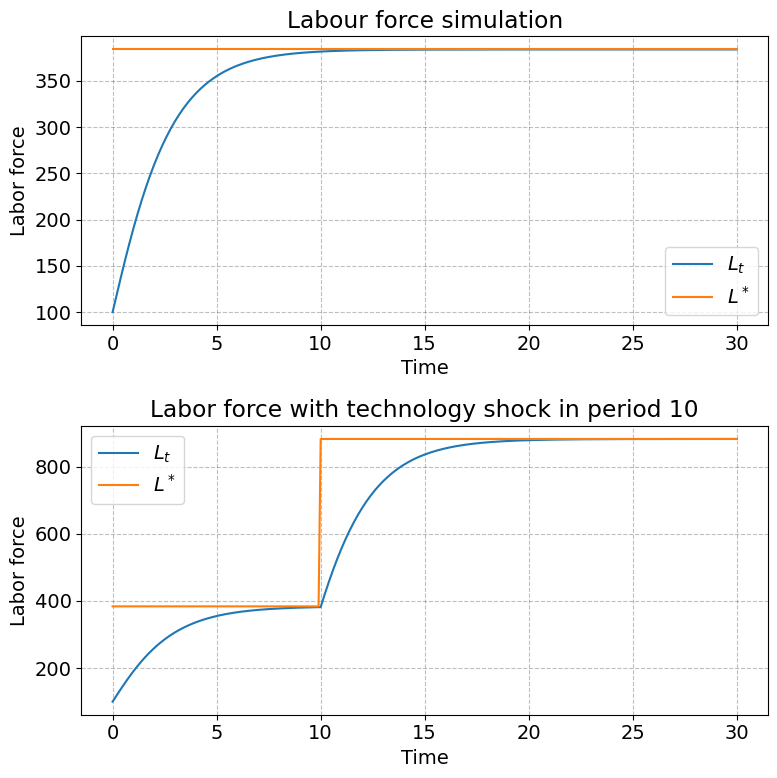

In [45]:
# call the model from the py-file
md.simulate_model()

The upper plot shows the adaption of the labor force to the steady state value in the economy. The bottom plot visualizes the adaption to steady state when a positive shock to the technology curve occurs in period 10. This shows, that a positive shock to the technology curve will cause the steady state value of the labour force to shift to a higher level.

In order to look further into the dynamics of the model when a positive technology shock occurs, we are plotting a simulation of the output per worker, y.

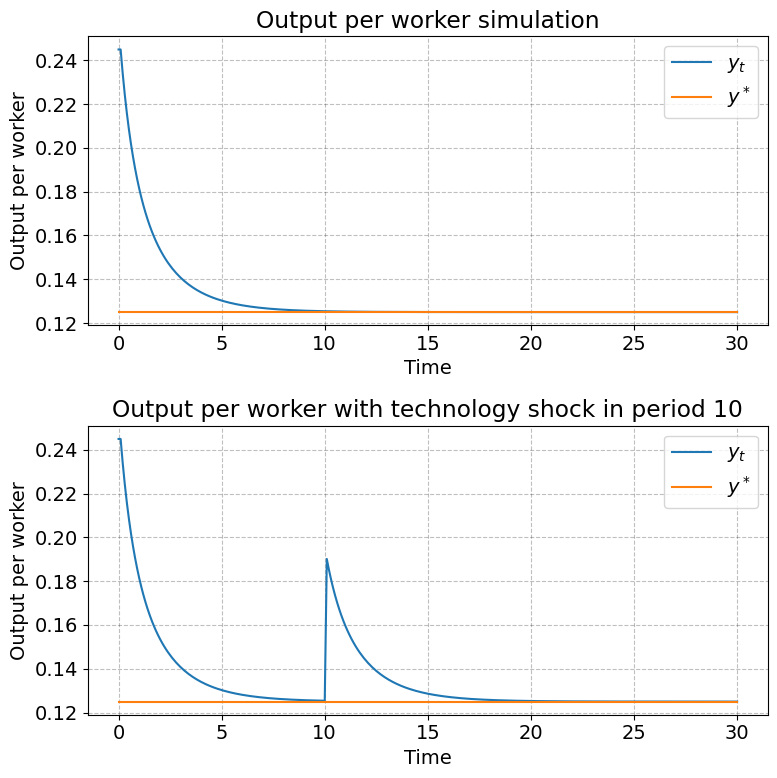

In [46]:
# call the plot for y_t from the py-file
md.plot_y_t()

These plots show the adaptions to the steady state level for output per worker. When a positive shift in the technology curve occurs, the output per worker will increase in the short run, as shown in the bottom plot. Then on the long run the output per worker will converge back to the old steady state value. As we saw in the previous plot the labor force will adjust to a new and higher level in the long run. As the the population grows, more resources such as food, clothes and so on will be used, and thus they will 'eat up' the excess income per worker until the previous steady state level is reached again. 

# Further analysis

The analysis can be expanded by changing some of the values of the variables in the model. We have chosen to show the example where the mortality rate is reduced from $0.1$ to $0.04$.
The new parameter values are as follows:

$$\alpha = 0.5$$
$$\eta = 0.8$$
$$\mu = 0.1$$
$$L_0 = 100$$
$$L_t = L_0$$
$$A = 2$$
$$X = 3$$

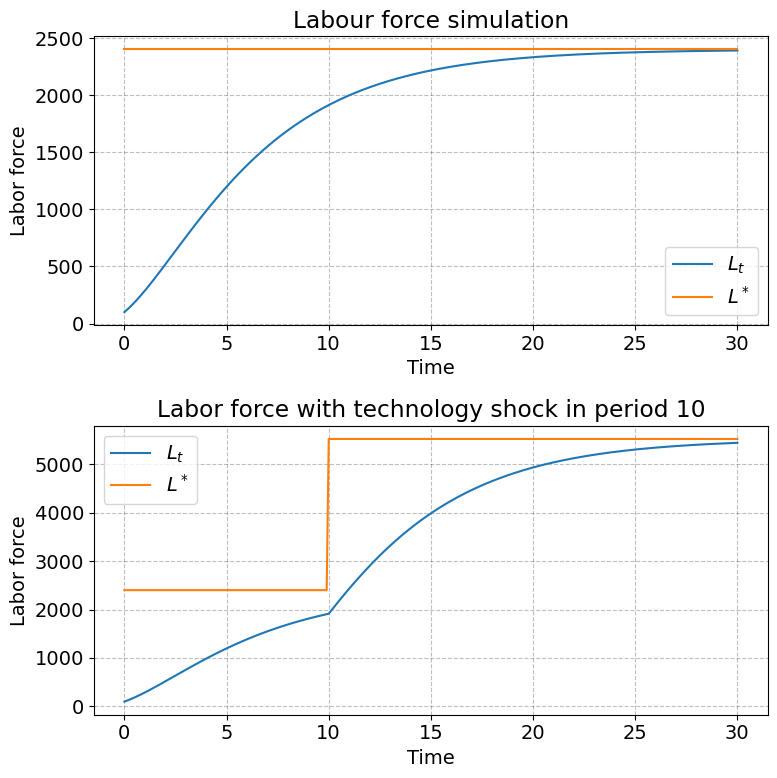

In [47]:
# call the plot
md.further_analysis()

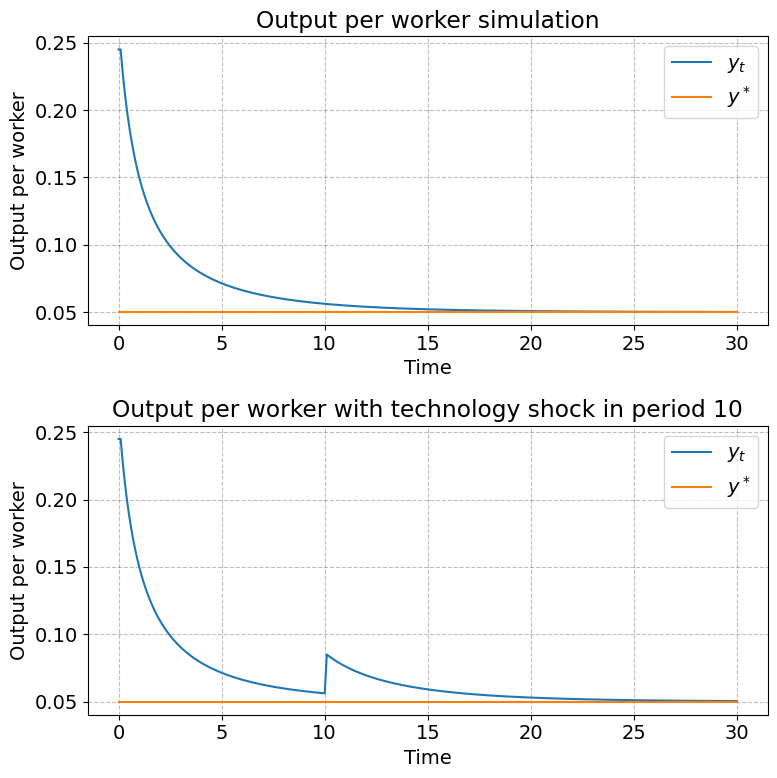

In [48]:
md.further_analysis_y_t()

From the top plot, it is apparent that when $\mu$ is reduced to 0.04 from 0.1 the labor force reaches the steady state level in a later period. This is due to the lower mortality rate, causing the population to grow and the steady state level to be higher. 

In the example where $\mu=0.1$, the labor force has reached the steady state level in period 10, when the shock in technology takes place. Eventhough the convergence is faster in the case where $\mu=0.04$, we can see that the steady state level is not reached in the same period. This is because the new steady state level is much higher in the new case, and thus it takes longer before the level is reached. The labor force reaches the steady state level around period 27 without the shock, and in the case with the technology shock the steady state level is reached even later. 

Looking at the steady state level of the labor force when $\mu=0.1$ we can see that it is approximately 400 before the and approximately 900 after the shock. When $\mu=0.04$ these values increases rapidly at approximately 2400 before the shock and approximately 5600 after the shock.

In the bottom plots, it is clear that output per worker reaches steady state at a slower rate than the previous plot. At the same time, the shock does not have as big an effect as before. 

We can thus see, that the mortality rate has a great impact on the labor force (population size) in this model.

It is possible to change some of the other parametres of the model in order to discover the effects of these. A change in either parameter will cause a change in the analysis of the model to some degree. This short analysis is however, only focused on a decrease in the mortality rate.

# Conclusion

To conclude this project, we have presented the Malthusian model with shocks to show the different dynamics of the model as well as how the birth rate is derived. The main focus was how shocks in the tecnology rate affected the labor force and the output per worker. From our chosen parameter values, it was clear that the steady state value of labor force would shift to a higher level. Meanwhile, the output per worker would temporarely shift up as the shock was introduced, but slowly move down towards the first assumed steady state. 

For the next plots in the further analysis, we tried to lower the parameter for mortality rate $\mu$, which showed a slower rate towards steady state. The reason behind is that the population becomes larger and therefore changes the steady state for labor force to be higher. For the technology shock, the labor force doesn't reach the steady state before the shock comes, which is due to the fact, that the transition towards steady state moves slower. In regards to the output per worker, the shock does not affect the output as much as before, which is because the population is larger.